<a href="https://colab.research.google.com/github/divyangnotfound/AICTE-OIB-SIP-AUGUST---P1-PROJECT/blob/main/OIBSIP_Data_Science_Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Sales Prediction using Python Task-5**

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.


Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv('/content/drive/MyDrive/Input_Data/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [45]:
print('Rows ---->',df.shape[0])
print('column --->',df.shape[1])

Rows ----> 200
column ---> 5


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [47]:
df.dtypes

,0
Unnamed: 0,int64
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [48]:
df.size

1000

In [49]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [50]:
df.isna().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [51]:
#check duplication
df.duplicated().sum()

np.int64(0)

In [52]:
df[:2]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [53]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [54]:
df_clean = df.drop(columns=[col for col in df.columns if 'Unnamed' in col])
df_melted = df_clean.melt(var_name='Feature', value_name='Value')


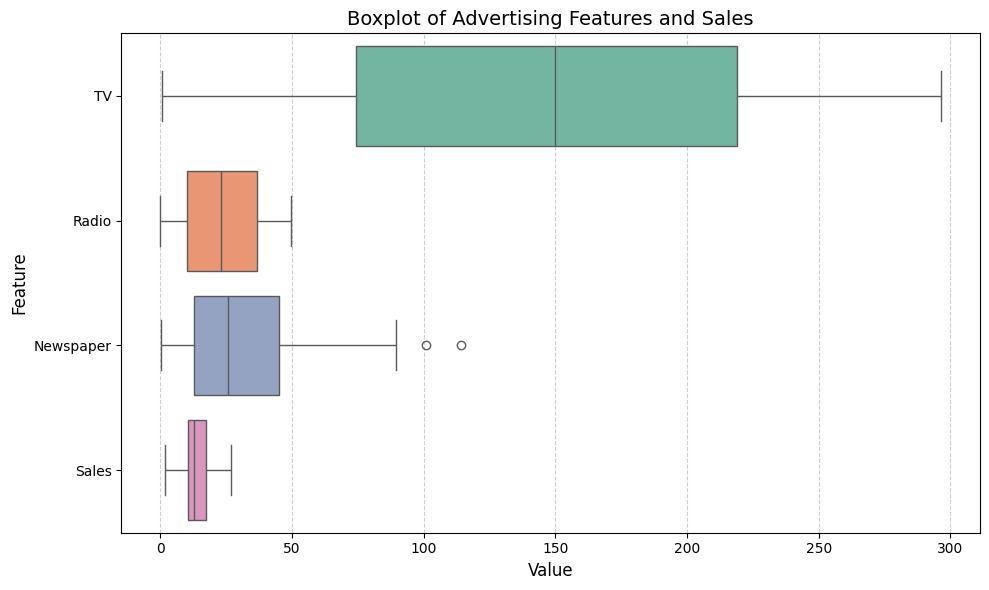

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Value', y='Feature', palette='Set2')
plt.title('Boxplot of Advertising Features and Sales', fontsize=14)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The boxplot indicates the presence of outliers in the Newspaper variable. However, in accordance with the problem statement, these outliers may hold valuable information relevant to forecasting future sales. Consequently, they have been retained in the dataset to preserve potentially informative variance.


In [56]:
df[:5]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


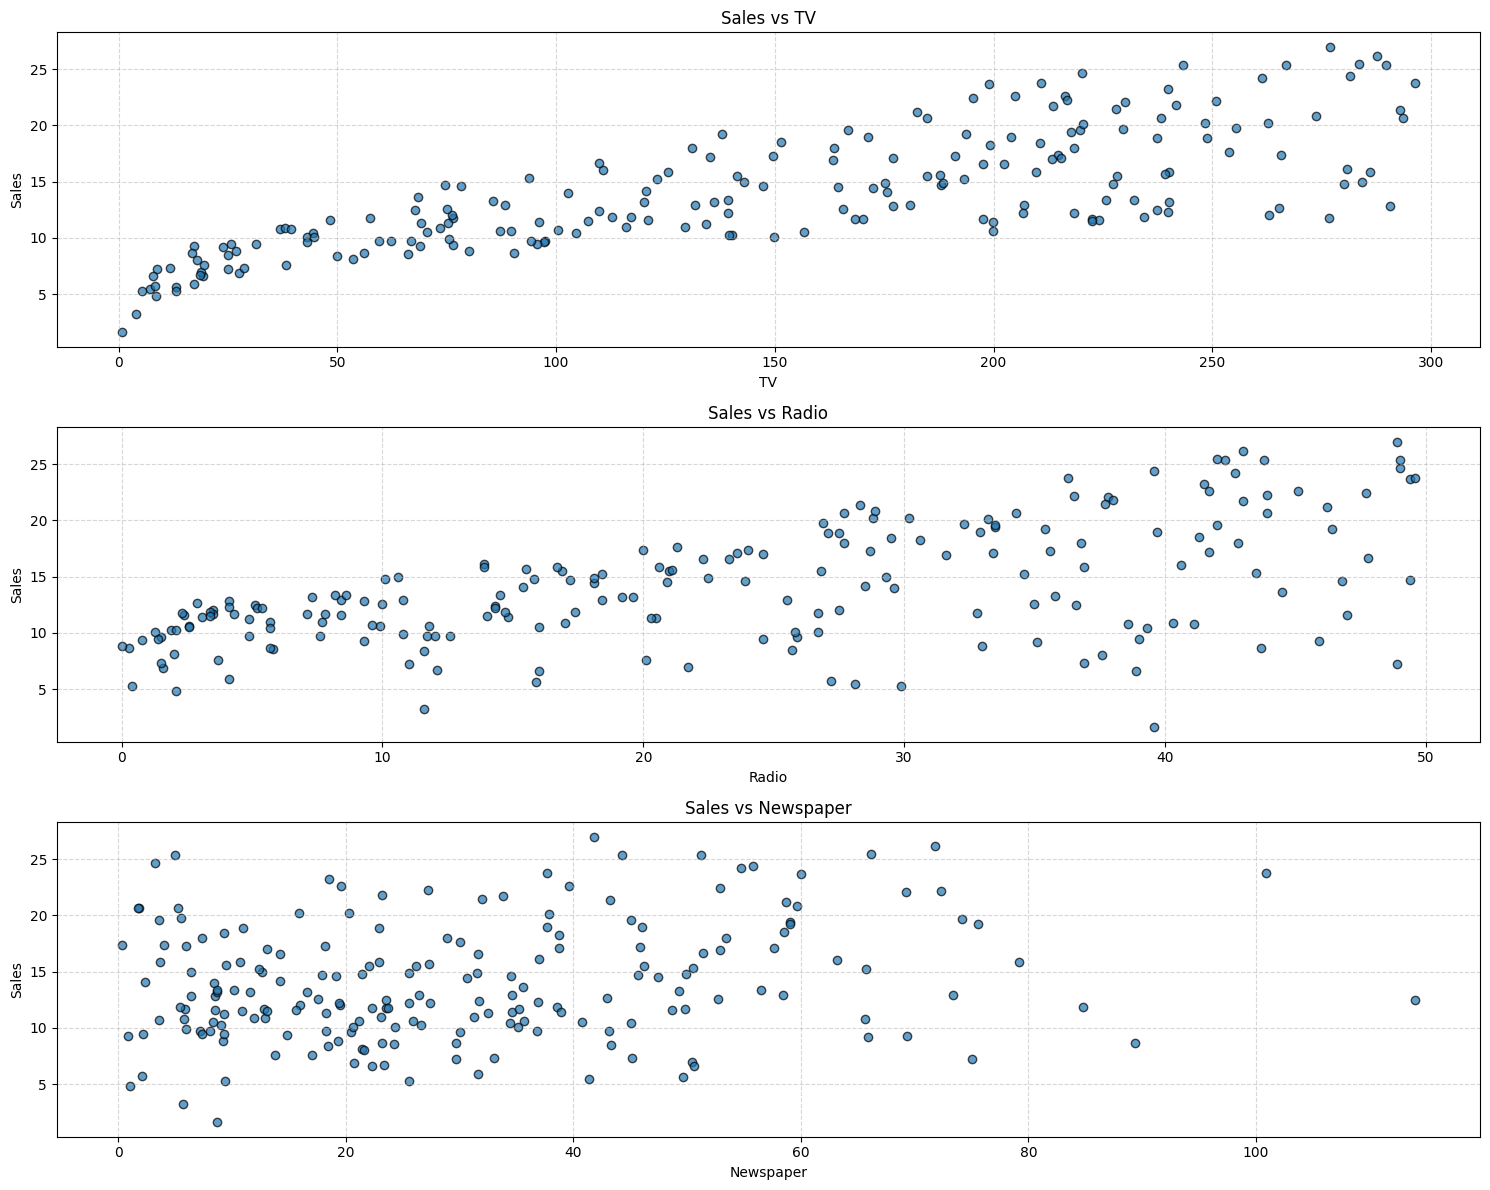

In [57]:
def plot_feature_vs_sales(df):
    features = [col for col in df.columns if col != 'Sales' and 'Unnamed' not in col]

    plt.figure(figsize=(15, 4 * len(features)))

    for idx, feature in enumerate(features):
        plt.subplot(len(features), 1, idx + 1)
        plt.scatter(df[feature], df['Sales'], alpha=0.7, edgecolor='k')
        plt.title(f'Sales vs {feature}')
        plt.xlabel(feature)
        plt.ylabel('Sales')
        plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()
plot_feature_vs_sales(df)


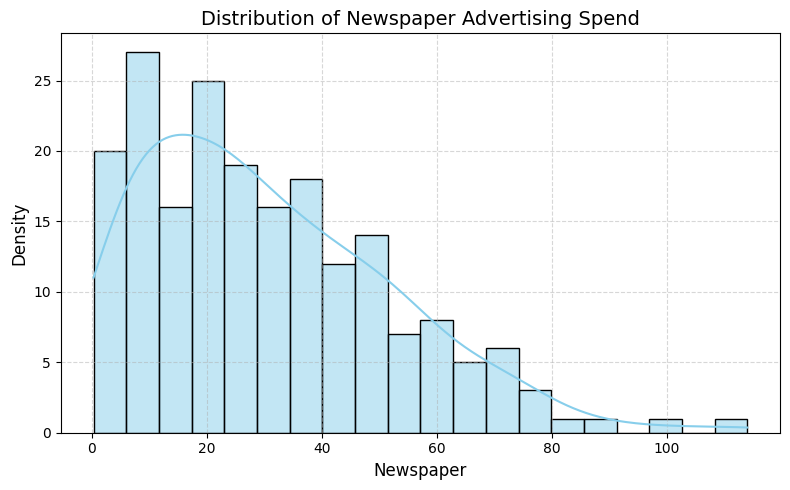

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Newspaper'], kde=True, color='skyblue', bins=20, edgecolor='black')
plt.title('Distribution of Newspaper Advertising Spend', fontsize=14)
plt.xlabel('Newspaper', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

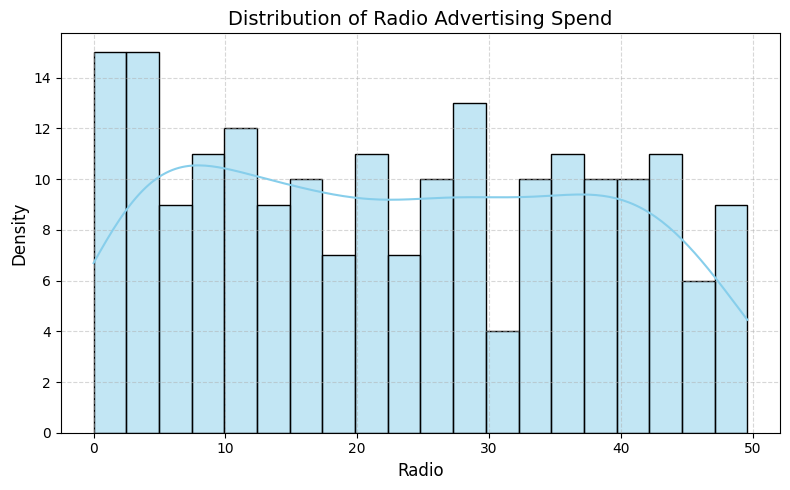

In [59]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Radio'], kde=True, bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Radio Advertising Spend', fontsize=14)
plt.xlabel('Radio', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [60]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [61]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [62]:
y = df.iloc[:,-1:]

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

In [64]:
xtrain,ytrain

(        TV  Radio  Newspaper
 71   109.8   14.3       31.7
 90   134.3    4.9        9.3
 100  222.4    4.3       49.8
 44    25.1   25.7       43.3
 94   107.4   14.0       10.9
 ..     ...    ...        ...
 58   210.8   49.6       37.7
 21   237.4    5.1       23.5
 49    66.9   11.7       36.8
 64   131.1   42.8       28.9
 68   237.4   27.5       11.0
 
 [140 rows x 3 columns],
      Sales
 71    12.4
 90    11.2
 100   11.7
 44     8.5
 94    11.5
 ..     ...
 58    23.8
 21    12.5
 49     9.7
 64    18.0
 68    18.9
 
 [140 rows x 1 columns])

In [65]:
xtest,ytest

(        TV  Radio  Newspaper
 56     7.3   28.1       41.4
 37    74.7   49.4       45.7
 67   139.3   14.5       10.2
 79   116.0    7.7       23.1
 80    76.4   26.7       22.3
 188  286.0   13.9        3.7
 183  287.6   43.0       71.8
 10    66.1    5.8       24.2
 128  220.3   49.0        3.2
 62   239.3   15.5       27.3
 65    69.0    9.3        0.9
 17   281.4   39.6       55.8
 133  219.8   33.5       45.1
 195   38.2    3.7       13.8
 146  240.1    7.3        8.7
 38    43.1   26.7       35.1
 173  168.4    7.1       12.8
 149   44.7   25.8       20.6
 93   250.9   36.5       72.3
 29    70.6   16.0       40.8
 0    230.1   37.8       69.2
 2     17.2   45.9       69.3
 122  224.0    2.4       15.6
 180  156.6    2.6        8.3
 95   163.3   31.6       52.9
 121   18.8   21.7       50.4
 185  205.0   45.1       19.6
 39   228.0   37.7       32.0
 66    31.5   24.6        2.2
 19   147.3   23.9       19.1
 11   214.7   24.0        4.0
 45   175.1   22.5       31.5
 41   177.

**Linear Regression**

In [66]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [67]:
model.fit(xtrain,ytrain)

LinearRegression()

In [68]:
ypred=model.predict(xtest)
ypred

array([[ 8.41710143],
       [15.36146115],
       [12.08619274],
       [ 9.75953058],
       [11.37799221],
       [18.73526253],
       [23.94158412],
       [ 7.11931733],
       [22.06606191],
       [16.83172907],
       [ 7.93115903],
       [23.07243791],
       [19.15729792],
       [ 5.47677475],
       [15.42102256],
       [ 9.82205717],
       [12.08023645],
       [ 9.76094922],
       [21.07717663],
       [ 9.13945016],
       [20.36205828],
       [12.03862691],
       [13.78082146],
       [10.73225482],
       [16.20061541],
       [ 7.77042699],
       [20.6251206 ],
       [20.31966315],
       [ 8.97266008],
       [14.13746173],
       [17.28381353],
       [15.13827164],
       [17.18376843],
       [19.03374633],
       [17.13952183],
       [12.14670527],
       [12.7815946 ],
       [ 6.08135492],
       [10.06634988],
       [13.48921606],
       [12.01549843],
       [ 9.70107337],
       [ 5.35398678],
       [10.14966171],
       [14.224196  ],
       [14

In [69]:
model.score(xtrain,ytrain)*100

88.44142326775768

In [70]:
model.score(xtest,ytest)*100

92.20854203535252

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [72]:
mean_squared_error(ytest,ypred)

2.2412862530933473

In [73]:
mean_absolute_error(ytest,ypred)

1.2212299380899396

In [74]:
r2_score(ytest,ypred)*100

92.20854203535252

In [75]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

np.float64(1.4970926000396059)

In [76]:
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [77]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [78]:
scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore=np.mean(scores)
finalscore

np.float64(0.8910650514774895)

In [83]:
param_grid = {
    'copy_X':[True],
    'n_jobs':[-1,1,2,-2],
    'positive':[False],
    'fit_intercept':[True]
    }

In [84]:
grid_model=GridSearchCV(model,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)
grid_model

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'positive': [False]})

In [85]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'positive': [False]})

In [86]:
grid_model.estimator

LinearRegression()

In [87]:
grid_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_jobs': -1,
 'param_grid': {'copy_X': [True],
  'n_jobs': [-1, 1, 2, -2],
  'positive': [False],
  'fit_intercept': [True]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [88]:
grid_model.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

In [89]:
grid_model.best_score_

np.float64(0.8686758831118258)

**LassoModel Evaluation**

In [90]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9204771495691686

In [96]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [97]:
grid_model_lasso=GridSearchCV(lasso,
    param_grid=lasso_grid_para,
    n_jobs=-1,
    cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [98]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [99]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [100]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.9204771495691686

**Conclusion :** After training and evaluating the Linear Regression and Lasso models, both models showed good performance on the test set, with R-squared scores above 92%. The Mean Squared Error (MSE) for the Linear Regression model is approximately 2.24, and the Root Mean Squared Error (RMSE) is around 1.5. Cross-validation with KFold resulted in an average R-squared score of approximately 0.89 for the Linear Regression model. GridSearchCV on the Linear Regression model yielded a best score of about 0.869.

Both the Linear Regression and Lasso models appear to be suitable for sales prediction based on the provided advertising data.